<a href="https://colab.research.google.com/github/machiwao/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [247]:
# put your answer here
df = pd.read_excel('personality.xlsx')
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Mark De Luna,0,1,0,24,0
1,Kit Nicholas Santiago,1,1,1,470,1
2,Jessy Mapanao,1,1,1,195,1
3,Kristel Malubay,0,1,0,804,0
4,Christian Joshua Alberto,1,1,1,122,1


1. Display the summary of all the features of the dataset using `.info()`

In [248]:
# put your answer here
df.drop(columns = 'Name', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       62 non-null     int64
 1   Active in social media?      62 non-null     int64
 2   Replies to comments?         62 non-null     int64
 3   Number of friends/followers  62 non-null     int64
 4   Personality                  62 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB


2. Display the total number of samples from each label using `.value_counts()`

In [249]:
# put your answer here
df['Personality'].value_counts()

,count
Personality,
0,31
1,31


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [250]:
# put your answer here
X = df.drop(columns = 'Personality').values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [251]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [269]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49, 4)
(13, 4)
(49,)
(13,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [270]:
score = []
k_range = list(range(1, 30))
best_k = 0
best_score = float('-inf')

for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train) # Train Model

  y_pred = knn_model.predict(X_test) # Predict labels for test set
  if knn_model.score(X_test, y_test) > best_score:
    best_score = knn_model.score(X_test, y_test)
    best_k = k
    print(f"Best model - k = {k}, Accuracy: {best_score}")

  score.append(knn_model.score(X_test, y_test))

Best model - k = 1, Accuracy: 0.6153846153846154
Best model - k = 4, Accuracy: 0.7692307692307693
Best model - k = 5, Accuracy: 0.8461538461538461


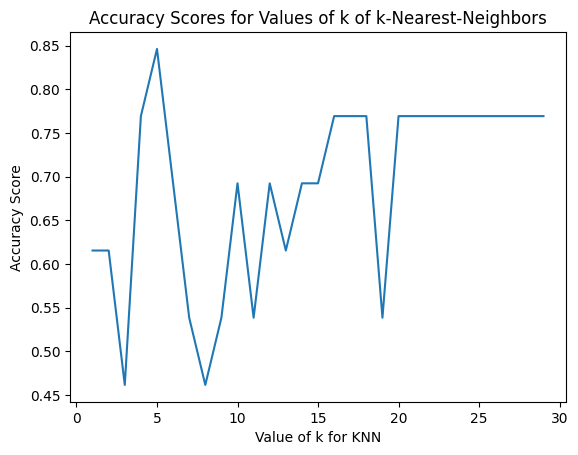

In [271]:
plt.plot(range(1,30), score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [272]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors = best_k)

7. Train the model using the `.fit()`

In [273]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier()

8. Test the model using the `.predict()`

In [274]:
# put your answer here
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

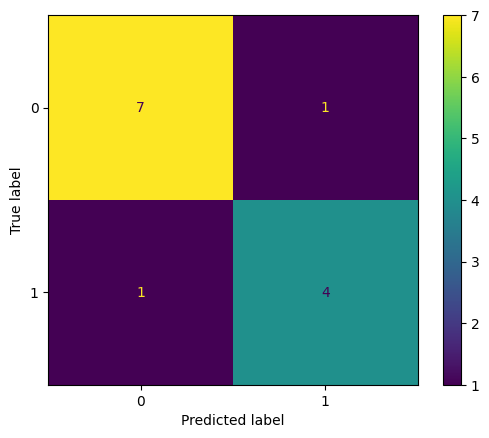

In [275]:
# put your answer here
conf_matrix = confusion_matrix(y_test, y_pred, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = knn.classes_)
disp.plot()

10. Display the accuracy

In [276]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)

0.8461538461538461

11. Display the precision

In [277]:
# put your answer here
precision = precision_score(y_test, y_pred, average = None)
print("Precision: ", precision)

Precision:  [0.875 0.8  ]


12. Display the recall

In [278]:
# put your answer here
recall = recall_score(y_test, y_pred, average = None)
print("Recall: ", recall)

Recall:  [0.875 0.8  ]


13. Display the f1-score

In [279]:
# put your answer here
f1 = f1_score(y_test, y_pred, average = None)
print("f1-score: ", f1)

f1-score:  [0.875 0.8  ]


In [280]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.80      0.80      0.80         5

    accuracy                           0.85        13
   macro avg       0.84      0.84      0.84        13
weighted avg       0.85      0.85      0.85        13



In [281]:
knn.predict([[0,1,0,1000]])

array([0])